<a href="https://colab.research.google.com/github/PDP1004/CNN_Fruit/blob/main/CNN_Fruit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import glob
import cv2
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from random import randint
from keras.utils import np_utils
from keras.models import Sequential, load_model
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import RMSprop, SGD, Adam
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)
training_set=train.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/FRUIT/train/train',target_size=(150,150), batch_size=1, class_mode='categorical')
validation_set=validation.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/FRUIT/train/validation',target_size=(150,150), batch_size=1, class_mode='categorical')

Found 120 images belonging to 6 classes.
Found 120 images belonging to 6 classes.


In [3]:
training_set.class_indices

{'buoi': 0, 'cam': 1, 'coc': 2, 'khe': 3, 'mit': 4, 'xoai': 5}

In [4]:
#Tạo Model
model = Sequential()

model.add(Conv2D(16,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(1024,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(6,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 64)       0

In [5]:
model.compile(optimizer=RMSprop(),loss='categorical_crossentropy',  metrics=['accuracy'])
from keras.callbacks import EarlyStopping
history = model.fit(training_set, epochs = 100, batch_size=120, validation_data = validation_set, verbose=1, callbacks=[EarlyStopping(monitor='val_loss', patience=50)])

Epoch 1/100
120/120 [==============================] - 134s 1s/step - loss: 23.1476 - accuracy: 0.3583 - val_loss: 3.4420 - val_accuracy: 0.4250
Epoch 2/100
120/120 [==============================] - 2s 20ms/step - loss: 5.1106 - accuracy: 0.6083 - val_loss: 2.1653 - val_accuracy: 0.5917
Epoch 3/100
120/120 [==============================] - 2s 20ms/step - loss: 4.2382 - accuracy: 0.7250 - val_loss: 1.6208 - val_accuracy: 0.6583
Epoch 4/100
120/120 [==============================] - 2s 20ms/step - loss: 4.4721 - accuracy: 0.7167 - val_loss: 4.2964 - val_accuracy: 0.5583
Epoch 5/100
120/120 [==============================] - 2s 20ms/step - loss: 2.8497 - accuracy: 0.8583 - val_loss: 1.9913 - val_accuracy: 0.7750
Epoch 6/100
120/120 [==============================] - 2s 20ms/step - loss: 2.1863 - accuracy: 0.8500 - val_loss: 17.3927 - val_accuracy: 0.3333
Epoch 7/100
120/120 [==============================] - 2s 21ms/step - loss: 3.9608 - accuracy: 0.8583 - val_loss: 4.2628 - val_accurac

Sai số kiểm tra là:  5.336398124694824
Độ chính xác kiểm tra là:  0.699999988079071


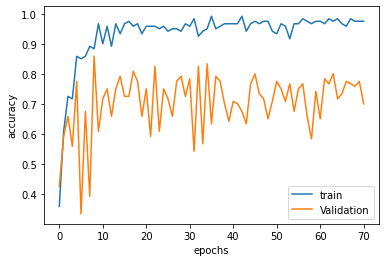

In [6]:
score = model.evaluate(validation_set,verbose=0)
print('Sai số kiểm tra là: ',score[0])
print('Độ chính xác kiểm tra là: ',score[1])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','Validation'])
plt.show()

In [7]:
model.save('model_save/CNN_Fruit.h5')

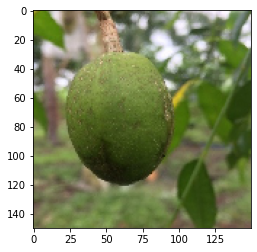

In [10]:
CNN_Fruit=load_model('model_save/CNN_Fruit.h5')
img_path = '/content/drive/MyDrive/Colab Notebooks/FRUIT/test/coc/Coc (1).jpg'
img=load_img(img_path,target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
pre=np.argmax(CNN_Fruit.predict(img),axis=1)
pred = model.predict(img)

classes = ['Buoi','Cam', 'Coc', 'Khe', 'Mit', 'Xoai']

In [11]:
print(np.argmax(pred))
if pre == 0:
  print(classes[0])
elif pre == 1:
    print(classes[1])
elif pre == 2:
    print(classes[2])
elif pre == 3:
    print(classes[3])
elif pre == 4:
    print(classes[4])
elif pre == 5 : 
  print(classes[5])

2
Coc
